DIY Covid-19 Dashboard - North West region

- Data from Public Health England (PHE) on Covid-19

There are 2 sections of data:

- Part 1 looks at overall cases, hospital cases requiring ventilator support and deaths.

- Part 2 looks at how age and gender affect cases.

(This has been repeated for the region of London for comparison.)

# Cases

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# an iPython  "magic" that enables the embedding of matplotlib output
%matplotlib inline

# make figures larger
plt.rcParams['figure.dpi'] = 100

with open("NW.json", "rt") as INFILE:
    data=json.load(INFILE)

In [14]:
datalist=data['data']

In [15]:
# sorts dates of data
dates=[dictionary['date'] for dictionary in datalist ]
dates.sort()

In [16]:
def parse_date(datestring):
    """ Convert a date string into a pandas datetime object """
    return pd.to_datetime(datestring, format="%Y-%m-%d")

In [17]:
# produces startdata to enddata: 2020-02-11 00:00:00  to  2020-10-21 00:00:00
startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])

In [18]:
# creates a template for data from start date to end date
index=pd.date_range(startdate, enddate, freq='D')
NWdf=pd.DataFrame(index=index, columns=['Cases', 'Ventilators', 'Deaths'])

In [19]:
# inputs data

for entry in datalist: # each entry is a dictionary with date, cases, ventilator cases and deaths
    date=parse_date(entry['date'])
    for column in ['Cases', 'Ventilators', 'Deaths']:
        if pd.isna(NWdf.loc[date, column]): 
            value= float(entry[column]) if entry[column]!=None else 0.0 # replace None with 0 in our data 
            # and put index,column in a single set of [ ]
            NWdf.loc[date, column]=value #.loc accesses a specific location in the dataframe
            
# fill in any remaining "holes" due to missing dates
NWdf.fillna(0.0, inplace=True)

Text(0, 0.5, 'Cases')

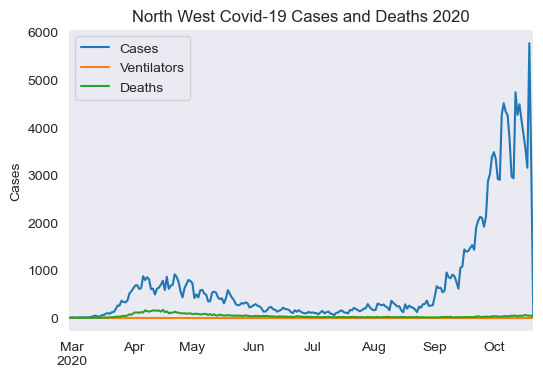

In [20]:
# plot and style graph
import seaborn as sns
sns.set_style("dark")
NWdf.plot()
plt.title("North West Covid-19 Cases and Deaths 2020")
plt.ylabel("Cases")

Text(0, 0.5, 'Cases in Log')

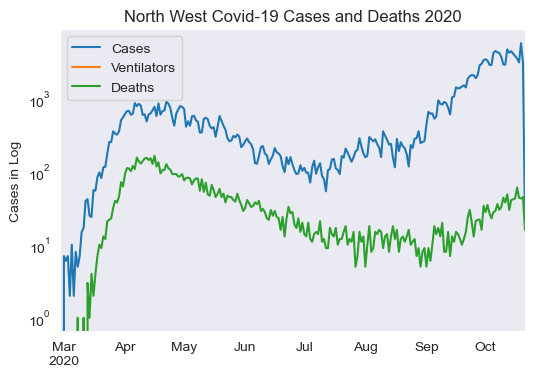

In [21]:
import seaborn as sns
sns.set_style("dark")
NWdf.plot(logy=True)
plt.title("North West Covid-19 Cases and Deaths 2020")
plt.ylabel("Cases in Log")

In [22]:
#object converted to byte stream
NWdf.to_pickle("NWdf.pkl")

In [23]:
import ipywidgets as wdg
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100

In [25]:
# API access function to download current Public Health England data
def access_api(button):
    print("Downloading data from the API...")
    print("...complete.")
    
apibutton=wdg.Button(
    description='Refresh data',
    disabled=False,
    button_style='',
    tooltip='Download current Public Health England data here',
    icon='Download'
)

# register the callback function with the button
apibutton.on_click(access_api)

# display the widgets
display(apibutton)

Button(description='Refresh data', icon='Download', style=ButtonStyle(), tooltip='Download current Public Heal…

In [26]:
NWdf=pd.read_pickle("NWdf.pkl")

... and now the option to toggle between variables.

In [27]:
# creates interactive graph

series=wdg.SelectMultiple(
    options=['Cases', 'Ventilators', 'Deaths'],
    value=['Cases', 'Ventilators', 'Deaths'],
    rows=3,
    description='Stats:',
    disabled=False
)

scale=wdg.RadioButtons(
    options=['linear', 'log'],
    description='Scale:',
    disabled=False
)

controls=wdg.HBox([series, scale])

def timeseries_graph(gcols, gscale):
    if gscale=='linear':
        logscale=False
    else:
        logscale=True
    ncols=len(gcols)
    if ncols>0:
        NWdf[list(gcols)].plot(logy=logscale)
    else:
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")

graph=wdg.interactive_output(timeseries_graph, {'gcols': series, 'gscale': scale})

display(controls, graph)

Output()

# Age and Gender

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import json
%matplotlib inline
plt.rcParams['figure.dpi'] = 100

In [29]:
# open age data file to read
with open("NWage.json", "rt") as INFILE:
    data=json.load(INFILE)

In [30]:
# create a dictionary for the data
datadic=data['data'][0] # data['data'] is a list

In [31]:
datalist=data['data']

In [32]:
Males=datadic['Males']
Females=datadic['Females']

In [33]:
# focusing only on Males to create age ranges as they have the same as Females
ageranges=[x['age'] for x in Males]

In [34]:
# definining age at which categories begin e.g. min_age of '85_to_90' = 85
def min_age(agerange):
    agerange=agerange.replace('+','') # remove the + from 90+
    start=agerange.split('_')[0]
    return int(start)

In [35]:
# sort age ranges into order
ageranges.sort(key=min_age)

In [36]:
ageNW_df=pd.DataFrame(index=ageranges, columns=['Males','Females', 'Total'])

In [37]:
for entry in Males: # each entry is a dictionary
    ageband=entry['age'] # our index position
    ageNW_df.loc[ageband, 'Males']=entry['value']
    
for entry in Females:
    ageband=entry['age']
    ageNW_df.loc[ageband, 'Females']=entry['value']
    
# total option
ageNW_df['Total']=ageNW_df['Males']+ageNW_df['Females']

# ageNW_df produces data in table form

Text(0, 0.5, 'Cases')

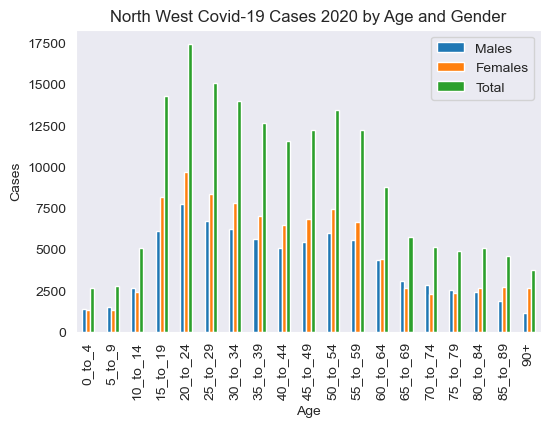

In [38]:
import seaborn as sns
sns.set_style("dark")
ageNW_df.plot(kind='bar', y=['Males','Females','Total'])
plt.title("North West Covid-19 Cases 2020 by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Cases")

Text(0, 0.5, 'Cases')

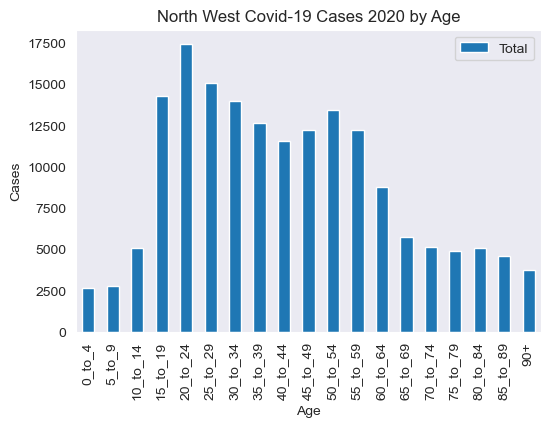

In [39]:
import seaborn as sns
sns.set_style("dark")
ageNW_df.plot(kind='bar', y='Total')
plt.title("North West Covid-19 Cases 2020 by Age")
plt.xlabel("Age")
plt.ylabel("Cases")

In [40]:
ageNW_df=pd.read_pickle("ageNWdf.pkl")

In [44]:
# data manipulation to create pie chart
MALETOTAL = sum(ageNW_df['Males'])
print("Male cases: ",MALETOTAL)
FEMALETOTAL =sum(ageNW_df['Females'])
print("Female cases: ",FEMALETOTAL)

Male cases:  75982
Female cases:  90651


... and now the interactive option comparing male, female and total data.

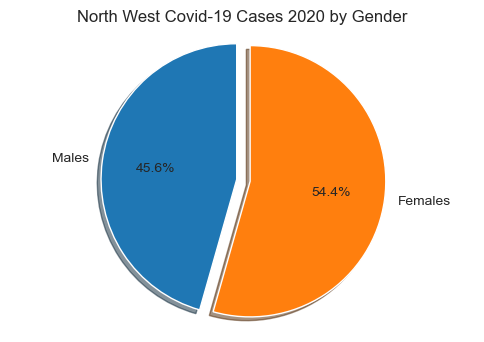

In [45]:
# create pie chart

import matplotlib.pyplot as plt

labels = 'Males', 'Females'
sizes = [MALETOTAL,FEMALETOTAL]
explode = (0, 0.1)  # explode one slide

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("North West Covid-19 Cases 2020 by Gender")
plt.show()

In [41]:
agecols=wdg.SelectMultiple(
    options=['Males', 'Females', 'Total'],
    value=['Males', 'Females'],
    rows=3, # rows of the selection box
    description='Sex',
    disabled=False
)

def age_graph(graphcolumns):
    # our callback function.
    ncols=len(graphcolumns)
    if ncols>0:
        ageNW_df.plot(kind='bar', y=list(graphcolumns))
    else:
        # if the user has not selected any column, print a message instead
        print("Select data for graph above")
        print("(CTRL-Click or highlight with cursor to select multiple categories)")
    
# keep calling age_graph(graphcolumns=value_of_agecols); capture output in variable output    
output=wdg.interactive_output(age_graph, {'graphcolumns': agecols})

display(agecols, output)

SelectMultiple(description='Sex', index=(0, 1), options=('Males', 'Females', 'Total'), rows=3, value=('Males',…

Output()

In [106]:
NWdf.to_pickle("NWdf.pkl")